In [112]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
import os
import yaml
import sys
import datetime
import glob

# used to access data directory
sys.path.insert(0,'../')

In [113]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [114]:
#  source ~/.ssh/iex_key.sh
# ENV var IEX_KEY
API_TOKEN=    credentials = yaml.load(open(os.path.expanduser(
        '~/.ssh/api_credentials.yml')))['iex']['api_key']

In [115]:
API_TOKEN

'pk_291949b3b45c490fa2a95869d87121c5'

In [116]:
sp = pd.read_csv('../data/S&P500-Symbols.csv', index_col=[0])


In [117]:
sp

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


## test calls to IEX

In [21]:
# getCompanyInfo returns a dictionary with the company symbol as a key and the info as the value 
# call to iex finance api to return company info for a list of symbols
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols, token=API_TOKEN)
    company_info = stock_batch.get_company()
    return company_info

In [22]:
sp_company_info = getCompanyInfo(sp["Symbol"][:5].tolist())


In [23]:
company_info_to_df = []
for company in sp_company_info:
    company_info_to_df.append(sp_company_info[company])

In [24]:
columns = ['symbol', 'companyName', 'exchange',
           'industry', 'website', 'CEO', 'sector']
company_info_to_df = pd.DataFrame(company_info_to_df, columns=columns )
company_info_to_df.head()

,symbol,companyName,exchange,industry,website,CEO,sector
0,MMM,3M Co.,New York Stock Exchange,Industrial Conglomerates,http://www.3m.com,Michael F. Roman,Producer Manufacturing
1,ABT,Abbott Laboratories,New York Stock Exchange,Medical Specialties,http://www.abbott.com,Robert B. Ford,Health Technology
2,ABBV,"AbbVie, Inc.",New York Stock Exchange,Pharmaceuticals: Major,http://www.abbvie.com,Richard A. Gonzalez,Health Technology
3,ABMD,"ABIOMED, Inc.",NASDAQ,Medical Specialties,http://www.abiomed.com,Michael R. Minogue,Health Technology
4,ACN,Accenture Plc,New York Stock Exchange,Information Technology Services,http://www.accenture.com,Julie Spellman Sweet,Technology Services


# Company Earnings

In [25]:
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token=API_TOKEN)
    earnings = stock_batch.get_earnings(last=4)
    return earnings

single_stock_earnings = getEarnings(sp["Symbol"][0])

In [26]:
single_stock_earnings

[{'actualEPS': 1.95,
  'consensusEPS': 2.11,
  'announceTime': 'BTO',
  'numberOfEstimates': 17,
  'EPSSurpriseDollar': -0.16,
  'EPSReportDate': '2020-01-28',
  'fiscalPeriod': 'Q4 2019',
  'fiscalEndDate': '2019-12-31',
  'yearAgo': 2.31,
  'yearAgoChangePercent': -0.1558,
  'currency': 'USD'},
 {'actualEPS': 2.58,
  'consensusEPS': 2.49,
  'announceTime': 'BTO',
  'numberOfEstimates': 16,
  'EPSSurpriseDollar': 0.09,
  'EPSReportDate': '2019-10-24',
  'fiscalPeriod': 'Q3 2019',
  'fiscalEndDate': '2019-09-30',
  'yearAgo': 2.58,
  'yearAgoChangePercent': 0,
  'currency': 'USD'},
 {'actualEPS': 2.2,
  'consensusEPS': 2.05,
  'announceTime': 'BTO',
  'numberOfEstimates': 16,
  'EPSSurpriseDollar': 0.15,
  'EPSReportDate': '2019-07-25',
  'fiscalPeriod': 'Q2 2019',
  'fiscalEndDate': '2019-06-30',
  'yearAgo': 2.59,
  'yearAgoChangePercent': -0.1506,
  'currency': 'USD'},
 {'actualEPS': 2.23,
  'consensusEPS': 2.49,
  'announceTime': 'BTO',
  'numberOfEstimates': 16,
  'EPSSurpriseDoll

## Historical Prices

In [124]:
def getHistoricalPrices(stock,start_date, end_date):
    return get_historical_data(stock, start_date, end_date, 
                               output_format='pandas', 
                               token=API_TOKEN)
 
start = datetime.datetime(2020, 4, 17)
end = datetime.datetime.now()
single_stock_history = getHistoricalPrices(sp["Symbol"][0], start, end)

In [55]:
sp["Symbol"][0]

'MMM'

In [28]:
single_stock_history

,open,high,low,close,volume
date,,,,,
2016-01-04,148.05,148.32,145.40,146.82,3277188
2016-01-05,146.82,147.50,145.61,147.46,2688082
2016-01-06,145.59,145.76,143.42,144.49,2997126
2016-01-07,142.52,143.13,140.63,140.97,3553519
2016-01-08,141.36,142.50,140.22,140.49,2663979
...,...,...,...,...,...
2020-04-13,147.50,148.58,145.30,146.40,2642295
2020-04-14,149.62,150.98,148.05,150.14,3318390
2020-04-15,148.19,148.55,144.90,145.16,3043859


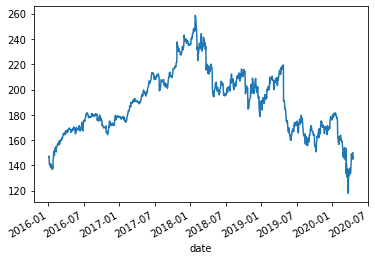

In [29]:
single_stock_history['close'].plot(label="3M Close")

# Get list of historical prices for the first 100 stocks


In [30]:
sp[:100]

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
95,CE
96,CNC
97,CNP
98,CTL


In [31]:
start = datetime(2016, 1, 1)
end = datetime(2020, 7, 30)

In [32]:
dict_of_stock_to_historical_price_df = {}

In [54]:

start.year, start.month, start.day

(2016, 1, 1)

In [33]:
for stock in sp.Symbol[:5]:
    print(f"Downloading data for {stock}")
    stock_history = getHistoricalPrices(f"{stock}", start, end)
    dict_of_stock_to_historical_price_df[stock] = stock_history

In [120]:
update_s_and_p_dataset(20)

downloading data for MMM
found existing stock for MMM
2020-04-17 00:00:00 2022-01-01 00:00:00
found existing stock for MMM
2020-04-17 00:00:00 2022-01-01 00:00:00
found existing stock for MMM
2020-04-17 00:00:00 2022-01-01 00:00:00
downloading data for ABT
found existing stock for ABT
2020-04-17 00:00:00 2022-01-01 00:00:00
downloading data for ABBV
found existing stock for ABBV
2020-04-17 00:00:00 2022-01-01 00:00:00
downloading data for ABMD
found existing stock for ABMD
2020-04-17 00:00:00 2022-01-01 00:00:00
downloading data for ACN
found existing stock for ACN
2020-04-17 00:00:00 2022-01-01 00:00:00
downloading data for ATVI
downloading data for ADBE
downloading data for AMD
downloading data for AAP
downloading data for AES
downloading data for AFL
downloading data for A
found existing stock for A
2020-04-17 00:00:00 2022-01-01 00:00:00
found existing stock for A
2020-04-17 00:00:00 2022-01-01 00:00:00
found existing stock for A
2020-04-17 00:00:00 2022-01-01 00:00:00
found existi

In [119]:



def update_s_and_p_dataset(n_stock_to_download=5, default_start =datetime.datetime(2016, 1, 1), end = datetime.datetime.now() ):
    """
    Run through the S and P data and update

    Minimize API calls by only pulling new data
    """
    file_path = '../data/historical_stock_data'
    for stock in sp.Symbol[:n_stock_to_download]:
        print(f"downloading data for {stock}")
        for file in glob.glob(f'{file_path}/*.csv'):
            if f"{stock}" in file: # we have a data file for this stock
                print(f'found existing stock for {stock}')
                # open file
                stock_df = pd.read_csv(f"{file}")
                most_recent_date = stock_df.date.max()
                oldest_date= stock_df.date.min()

                most_recent_year, most_recent_month, most_recent_day = most_recent_date.split('-')
                oldest_year, oldest_month, oldest_day = oldest_date.split('-')

                start = datetime.datetime(int(most_recent_year), int(most_recent_month), int(most_recent_day))
                print(start, end)
                stock_history = getHistoricalPrices(f"{stock}", start, end)
                
                # delete the old file
                os.remove(f"{file}")

            else: # we don't have this stocks data
                stock_history = getHistoricalPrices(f"{stock}", default_start, end)
                oldest_year=default_start.year
                oldest_month=default_start.month
                oldest_day=default_start.day
                
        now = datetime.datetime.now()
        now_year = now.year
        now_month = now.month
        now_day = now.day
        # save the file
        stock_history.to_csv(f'{file_path}/{stock}_{oldest_year}-{oldest_month}-{oldest_day}_to_{now_year}-{now_month}-{now_day}.csv')





In [44]:
dict_of_stock_to_historical_price_df['MMM'].index.max() # index is dat as returned from the API

Timestamp('2020-04-17 00:00:00')

In [70]:
mmm_df = pd.read_csv('../data/MMM_2016-01-04_to_2020-04-17.csv')

In [72]:
mmm_df.date.max()

'2020-04-17'

In [68]:
dict_of_stock_to_historical_price_df['MMM'].to_csv('../data/MMM_2016-01-04_to_2020-04-17.csv')